In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
import pandas as pd
import scipy.stats
import sys
sys.path.insert(1, '/glade/u/home/lettier/analysis/')
import master_utils as myf

This work contains some initial attempts at plotting the AMOC using annual data

In [36]:
mydir = '/glade/work/lettier/NUDGE/processed/moc/'
myfiles = [mydir+f for f in sorted(os.listdir(mydir)) if '.nc' in f and 'monthly' not in f]

listds = []
for f in myfiles:
    ds = xr.open_dataset(f)
    ds = ds.set_coords('names')
    listds.append(ds)
ds = xr.concat(listds,dim='names')

mylist = []
for f in ds.names.values:
    if 'LENS' in f:
        mylist.append({'label' : 'LENS', 'c' : 'tab:blue', 'linewidth' : .5, 'alpha' : .3})
    elif 'era_60' in f:
        mylist.append({'label' : 'NUDGE-anom-60', 'c' : 'tab:green', 'linewidth' : 2, 'alpha' : 1.})
    elif 'SH' in f:
        mylist.append({'label' : 'NUDGE-SH', 'c' : 'tab:cyan', 'linewidth' : 2, 'alpha' : 1.})

     
    elif 'anom' in f:
        mylist.append({'label' : 'NUDGE-anom', 'c' : 'orange', 'linewidth' : 2, 'alpha' : 1.})
    elif 'Boot' in f or 'NASA' in f or 'OSI' in f:
         mylist.append({'label' : 'OBS-'+f, 'c' : 'k', 'linewidth' : 2, 'alpha' : 1.})
    else:
        mylist.append({'label' : 'NUDGE', 'c' : 'tab:red', 'linewidth' : 2, 'alpha' : 1.})
  
df = pd.DataFrame(mylist, index = ds.names.values) 
df = df.transpose()

In [38]:
ds

<xarray.Dataset>
Dimensions:       (lat_aux_grid: 395, names: 41, transport_reg: 2, year: 40)
Coordinates:
  * year          (year) int64 1979 1980 1981 1982 1983 ... 2015 2016 2017 2018
  * lat_aux_grid  (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * names         (names) <U19 'LENS01' 'LENS02' ... 'nudge_era_high'
Dimensions without coordinates: transport_reg
Data variables:
    MOC           (names, year, transport_reg, lat_aux_grid) float32 0.0 ... ...
Attributes: (12/14)
    title:                     b.e11.B20TRC5CNBDRD.f09_g16.001
    history:                   Sat Aug 31 17:35:41 2013: /glade/apps/opt/nco/...
    Conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    contents:                  Diagnostic and Prognostic Variables
    source:                    CCSM POP2, the CCSM Ocean Component
    revision:                  $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy...
    ...                        ...
    cell_methods:              cell_methods = time: mean ==> the variable val...
    nsteps_total:              750
    tavg_sum:                  2592000.0
    tavg_sum_qflux:            2592000.0
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

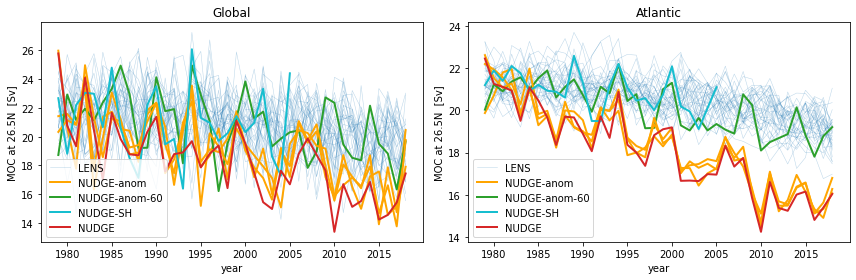

In [9]:
fig = plt.figure(figsize=(12,4))
for r in range(2):
    ax = plt.subplot(1,2,r+1)
    
    for n, name in enumerate(ds.names.values):
        ds.isel(names=n).isel(transport_reg=r).MOC.interp(lat_aux_grid=26.5).plot(ax=ax, **df[name].to_dict())     

    ax.set_title(['Global','Atlantic'][r])
    ax.legend()
    ax.set_ylabel('MOC at 26.5N  [Sv]')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    
plt.tight_layout()
##fig.savefig('figs/allnudge_moc_26.5N_timeseries_1979-2018.png', bbox_inches='tight')
plt.show(); plt.close()

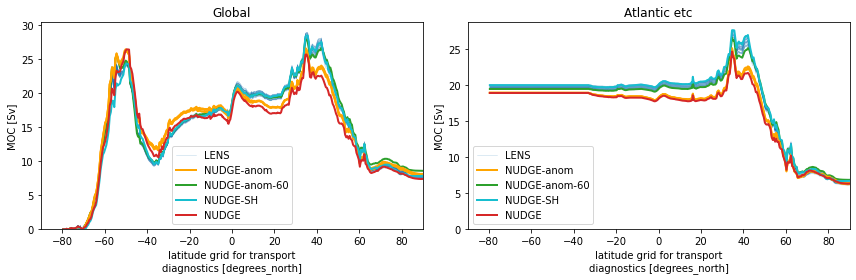

In [10]:
fig = plt.figure(figsize=(12,4))
for r in range(2):
    ax = plt.subplot(1,2,r+1)
    
    for n, name in enumerate(ds.names.values):
        ds.isel(names=n).isel(transport_reg=r).MOC.mean(dim='year').plot(ax=ax, **df[name].to_dict())     

    ax.set_title(['Global','Atlantic etc'][r])
    ax.legend()
    ax.set_ylabel('MOC [Sv]')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    ax.set_ylim(bottom=0.)
    ax.set_xlim([-90,90])

plt.tight_layout()
#fig.savefig('figs/allnudge_moc_clim_by_lat_1979-2018.png', bbox_inches='tight')
plt.show(); plt.close()

In [11]:
slope, intercept, r_value, p_value, std_err = myf.linregress(ds.year,ds.load(),dim='year')

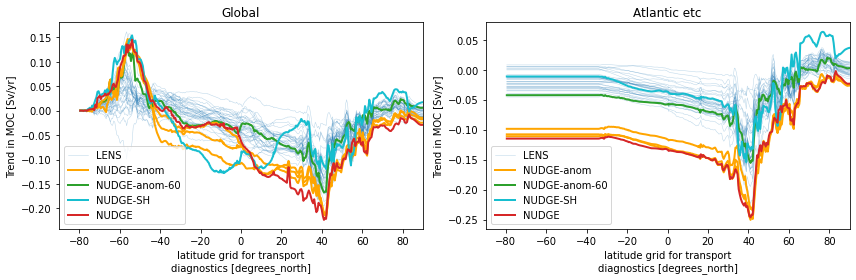

In [12]:
fig = plt.figure(figsize=(12,4))
for r in range(2):
    ax = plt.subplot(1,2,r+1)
    
    for n, name in enumerate(ds.names.values):
        slope.isel(names=n).isel(transport_reg=r).MOC.plot(ax=ax, **df[name].to_dict())     

    ax.set_title(['Global','Atlantic etc'][r])
    ax.legend()
    ax.set_ylabel('Trend in MOC [Sv/yr]')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    #ax.set_ylim(bottom=0.)
    ax.set_xlim([-90,90])

plt.tight_layout()
plt.show(); plt.close()

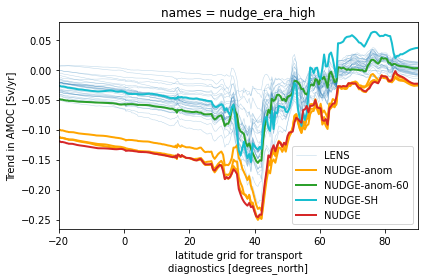

In [13]:
fig = plt.figure(figsize=(6,4))
r = 1
ax = plt.subplot(1,1,1)

for n, name in enumerate(ds.names.values):
    slope.isel(names=n).isel(transport_reg=r).MOC.plot(ax=ax, **df[name].to_dict())     


ax.legend()
ax.set_ylabel('Trend in AMOC [Sv/yr]')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#ax.set_ylim(bottom=0.)
ax.set_xlim([-20,90])

plt.tight_layout()
plt.show(); plt.close()

In [14]:
amoc = ds.isel(transport_reg=1).MOC.interp(lat_aux_grid=26.5)

In [15]:
slope, intercept, r_value, p_value, std_err = myf.linregress(amoc.year,amoc.load(),dim='year')

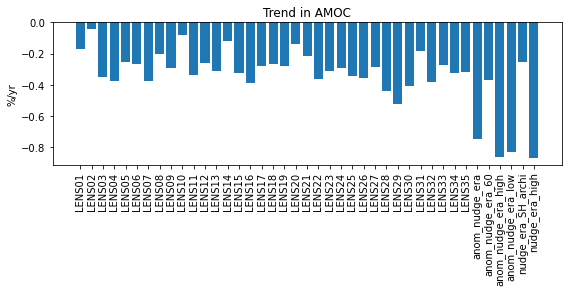

In [16]:
fig, ax = plt.subplots(1,figsize=(8,4))
ax.bar(slope.names.values,100.*slope/amoc.mean(dim='year'))
ax.set_xticklabels(slope.names.values,rotation='vertical')
ax.set_ylabel('%/yr')
plt.tight_layout()
ax.set_title('Trend in AMOC')
plt.show()

In [29]:
rapid = xr.open_dataset('/glade/work/lettier/RAPID/moc_transports.nc').moc_mar_hc10
#print(rapid.time.values[:30])
#rapid = rapid.resample(time='1D').mean('time')
#rapid_mon = rapid.resample(time='1M').mean('time')

rapid_smooth = rapid.rolling(time=180, center=True).mean()
rapid_yr = rapid_smooth.resample(time='1Y').mean('time')
rapid_yr = rapid_yr.rename({'time':'year'})
rapid_yr['year'] = np.arange(2004,2019,1)

Frajka-Williams (2015) For this study, time series are further bin averaged onto a monthly time grid to match SLA. A seasonal climatology is removed, then residual anomalies are smoothed with a 1.5 year Tukey filter. This processing reduces the strong seasonal cycle as well as other subannual variations. 2.2.

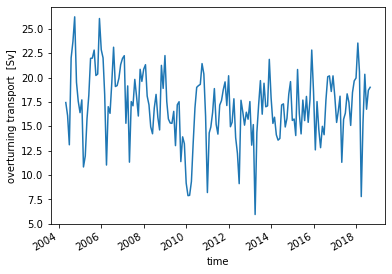

In [31]:
rapid = xr.open_dataset('/glade/work/lettier/RAPID/moc_transports.nc').moc_mar_hc10
rapid_mon = rapid.resample(time='1M').mean('time')
rapid_mon.plot()

In [34]:
rapid_mon_anom = rapid_mon - rapid_mon.groupby('time.month').mean(dim='time')

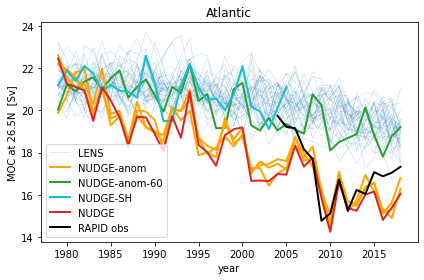

In [30]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(1,1,1)

for n, name in enumerate(ds.names.values):
    ds.isel(names=n).isel(transport_reg=1).MOC.interp(lat_aux_grid=26.5).plot(ax=ax, **df[name].to_dict())     

rapid_yr.plot(ax=ax,label='RAPID obs',c='k',linewidth=2) 
    
ax.set_title('Atlantic')
ax.legend()
ax.set_ylabel('MOC at 26.5N  [Sv]')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()
#fig.savefig('figs/allnudge_moc_26.5N_timeseries_1979-2018_withobs.png', bbox_inches='tight')
plt.show(); plt.close()

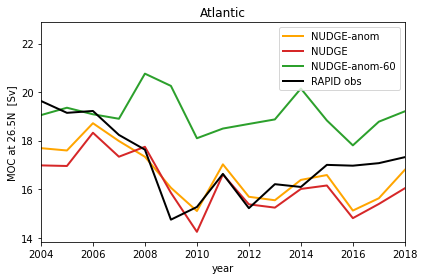

In [19]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(1,1,1)

for n, name in enumerate(['anom_nudge_era','nudge_era_high','anom_nudge_era_60']):
    ds.sel(names=name).isel(transport_reg=1).MOC.interp(lat_aux_grid=26.5).plot(ax=ax, **df[name].to_dict())     

rapid_yr.plot(ax=ax,label='RAPID obs',c='k',linewidth=2) 
    
ax.set_title('Atlantic')
ax.legend()
ax.set_ylabel('MOC at 26.5N  [Sv]')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlim([2004,2018])
plt.tight_layout()
##fig.savefig('figs/allnudge_moc_26.5N_timeseries_1979-2018_withobs.png', bbox_inches='tight')
plt.show(); plt.close()

In [20]:
slope_r, intercept_r, r_value_r, p_value_r, std_err_r = myf.linregress(rapid_yr.year,rapid_yr.load(),dim='year')

In [21]:
rapid_yr.year

<xarray.DataArray 'year' (year: 15)>
array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])
Coordinates:
  * year     (year) int64 2004 2005 2006 2007 2008 ... 2014 2015 2016 2017 2018

In [22]:
slope.names.values

array(['LENS01', 'LENS02', 'LENS03', 'LENS04', 'LENS05', 'LENS06',
       'LENS07', 'LENS08', 'LENS09', 'LENS10', 'LENS11', 'LENS12',
       'LENS13', 'LENS14', 'LENS15', 'LENS16', 'LENS17', 'LENS18',
       'LENS19', 'LENS20', 'LENS21', 'LENS22', 'LENS23', 'LENS24',
       'LENS25', 'LENS26', 'LENS27', 'LENS28', 'LENS29', 'LENS30',
       'LENS31', 'LENS32', 'LENS33', 'LENS34', 'LENS35', 'anom_nudge_era',
       'anom_nudge_era_60', 'anom_nudge_era_high', 'anom_nudge_era_low',
       'nudge_era_SH_archi', 'nudge_era_high'], dtype='<U19')

In [23]:
slope = slope.sel(names=['LENS01', 'LENS02', 'LENS03', 'LENS04', 'LENS05', 'LENS06',
       'LENS07', 'LENS08', 'LENS09', 'LENS10', 'LENS11', 'LENS12',
       'LENS13', 'LENS14', 'LENS15', 'LENS16', 'LENS17', 'LENS18',
       'LENS19', 'LENS20', 'LENS21', 'LENS22', 'LENS23', 'LENS24',
       'LENS25', 'LENS26', 'LENS27', 'LENS28', 'LENS29', 'LENS30',
       'LENS31', 'LENS32', 'LENS33', 'LENS34', 'LENS35', 'anom_nudge_era_60',
       'anom_nudge_era', 'anom_nudge_era_high', 'anom_nudge_era_low',
       'nudge_era_high'])

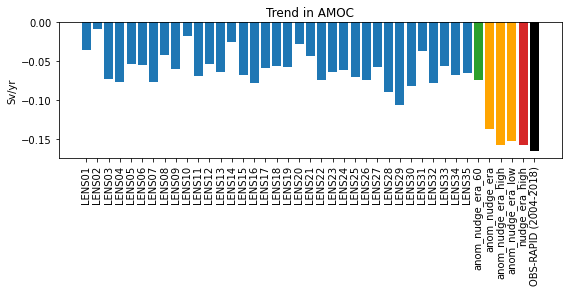

In [24]:
fig, ax = plt.subplots(1,figsize=(8,4))
for n, name in enumerate(slope.names.values):
    ax.bar(n,slope.sel(names=name), facecolor = df[name]['c'])
ax.bar(n+1,slope_r, facecolor='k')
ax.set_xticks(np.arange(len(slope.names.values)+1))
ax.set_xticklabels(list(slope.names.values)+['OBS-RAPID (2004-2018)'],rotation='vertical')
ax.set_ylabel('Sv/yr')
plt.tight_layout()
ax.set_title('Trend in AMOC')
#fig.savefig('figs/allnudge_moc_26.5N_trend_1979-2018_withobs.png', bbox_inches='tight')
plt.show()

In [25]:
osnap_ds = xr.open_dataset('/glade/work/lettier/OSNAP/OSNAP_MOC_TimeSeries_201408_201805_2020.nc')

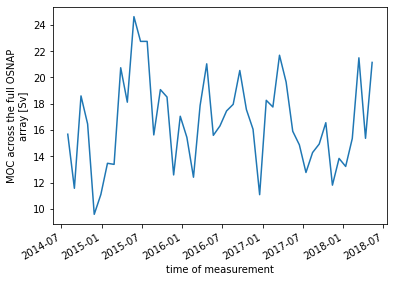

In [26]:
osnap_ds.MOC_ALL.plot()

In [27]:
osnap_ds

<xarray.Dataset>
Dimensions:       (TIME: 47)
Coordinates:
  * TIME          (TIME) datetime64[ns] 2014-07-31 2014-08-30 ... 2018-05-11
Data variables:
    MOC_ALL       (TIME) float64 ...
    MOC_ALL_ERR   (TIME) float64 ...
    MOC_WEST      (TIME) float64 ...
    MOC_WEST_ERR  (TIME) float64 ...
    MOC_EAST      (TIME) float64 ...
    MOC_EAST_ERR  (TIME) float64 ...
Attributes: (12/17)
    title:                     OSNAP MOC time series (2014-2018)
    project:                   OSNAP
    contributor_name:          F. Li; M.S. Lozier; S. Bacon; A. Bower; S.A. C...
    contributor_role:          data design, collection and/or processing
    contributor_institution:   Georgia Institute of Technology, USA; National...
    publisher_name:            M. Susan Lozier; Feili Li
    ...                        ...
    date_created:              2020-03-28 18:26:23; 2020-03-31 00:44:14; 2020...
    time_coverage_start:       2014-07-31 00:00:00
    time_coverage_end:         2018-06-09 00:00:00
    time_coverage_duratinon:   P630D
    time_coverage_resolution:  PT30D
    netcdf_version:            4.3

<xarray.DataArray 'year' (year: 40)>
array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2014 2015 2016 2017 2018
    names    <U19 'anom_nudge_era'
<xarray.DataArray 'year' (year: 40)>
array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2014 2015 2016 2017 2018
    names    <U19 'nudge_era_high'
<xarray.DataArray 'year' (year: 40)>
array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 199

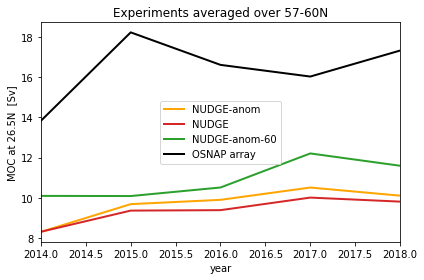

In [28]:
fig = plt.figure(figsize=(6,4))

ax = plt.subplot(1,1,1)

for n, name in enumerate(['anom_nudge_era','nudge_era_high','anom_nudge_era_60']):
    mydata = ds.sel(names=name).isel(transport_reg=1).MOC.sel(lat_aux_grid=[57.049053 ,  57.583294 ,  58.117535 ,
        58.651775 ,  59.186016 ,  59.720253 ]).mean(dim='lat_aux_grid')
    print(mydata.year)
    mydata.plot(ax=ax, **df[name].to_dict())     

ax.plot(np.arange(2014,2019,1),osnap_ds.MOC_ALL.groupby('TIME.year').mean(dim='TIME').values,c='k',linewidth=2,label='OSNAP array')

    
ax.set_title('Experiments averaged over 57-60N')
ax.legend()
ax.set_ylabel('MOC at 26.5N  [Sv]')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlim([2014,2018])
plt.tight_layout()

plt.show(); plt.close()